In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


**data set information** : there are 5 coloums in this dataset sepal length , sepal width, petal width , petal length and according to these 4 diffrent coums we are classifying species of iris flower , such as Iris-setosa , Iris Versicolour , Iris Virgincia 

**IMPORTING MODULES SINCE THE DATASET IS ALREADY LOADED**

In [3]:
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df  = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
 #this define that data has 150 rows and 5 coloumns
df.shape

(150, 5)

In [6]:
# this define the data type we are dealing with 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#display basic stats of the  data 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#displaying no. of samples on each class 
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
#preprocessing the datset 
#checking for null values 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

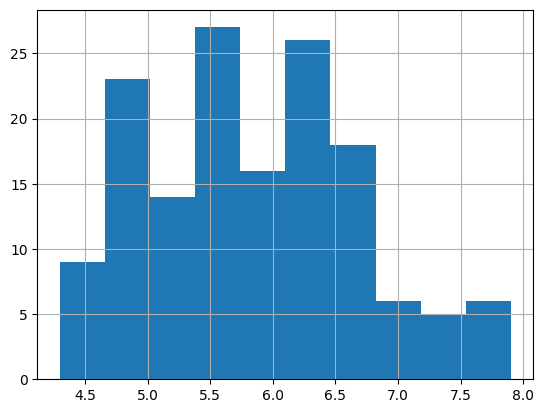

In [10]:
#the data is complelty clean so we can move to eda 
df['sepal_length'].hist()

<Axes: >

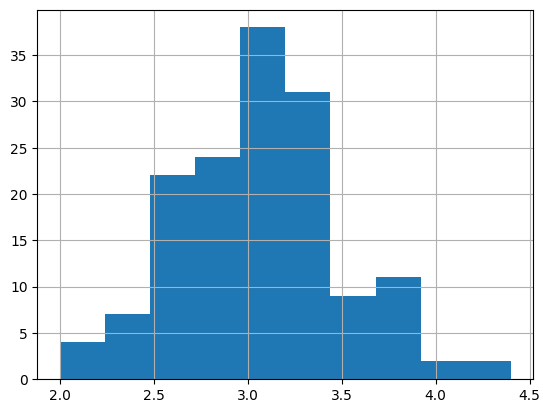

In [11]:
df['sepal_width'].hist()

<Axes: >

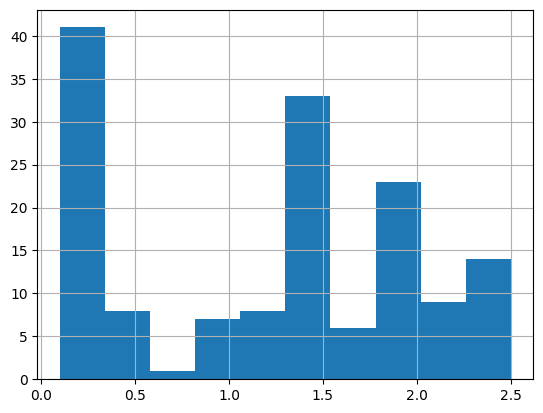

In [12]:
df['petal_width'].hist()

<Axes: >

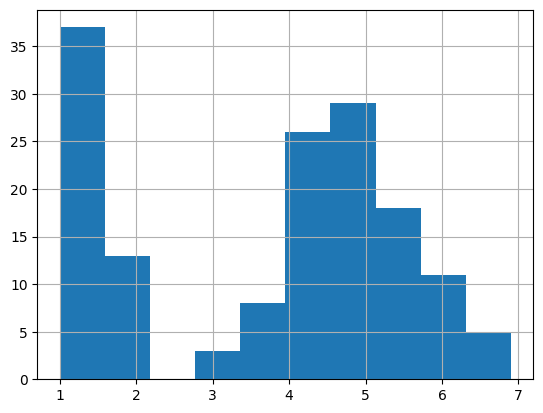

In [13]:
df['petal_length'].hist()

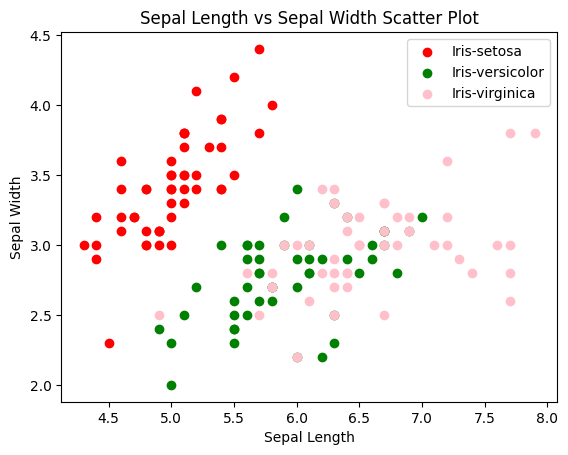

In [14]:

species = df['species'].unique()  # Extract unique species
colors = ['red', 'green', 'pink']  # Define colors for each species

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('Sepal Length vs Sepal Width Scatter Plot')
plt.show()


> THIS SCATTER PLOT SHOWS THAT IRIS SETOSA HAS DISTINGUISH FEATURES IN TERMS SEPAL LENGTH AND WIDTH WHILE THE OTHER TWO CLASSES OVERLAPS EACH OTHER > 

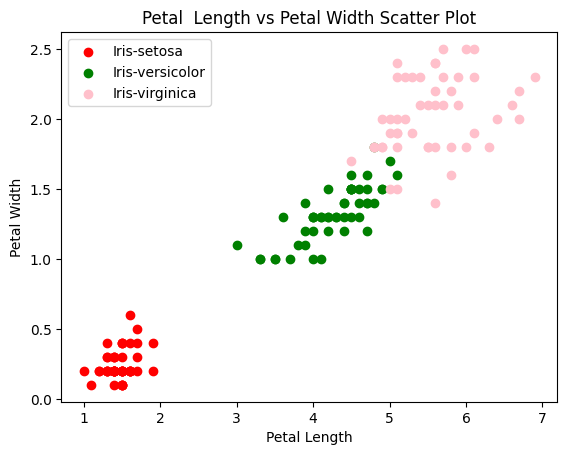

In [15]:
species = df['species'].unique()  # Extract unique species
colors = ['red', 'green', 'pink']  # Define colors for each species

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.title('Petal  Length vs Petal Width Scatter Plot')
plt.show()

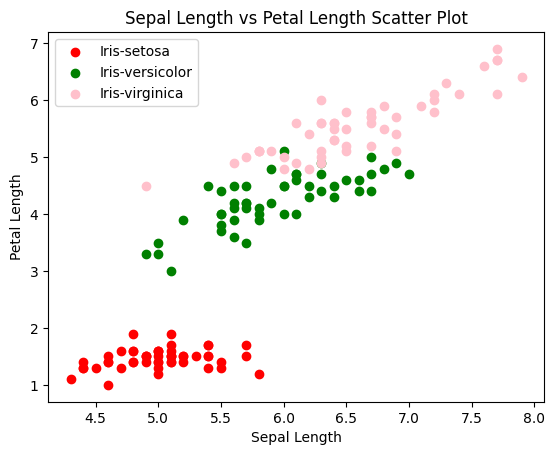

In [16]:
species = df['species'].unique()  # Extract unique species
colors = ['red', 'green', 'pink']  # Define colors for each species

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.title('Sepal Length vs Petal Length Scatter Plot')
plt.show()

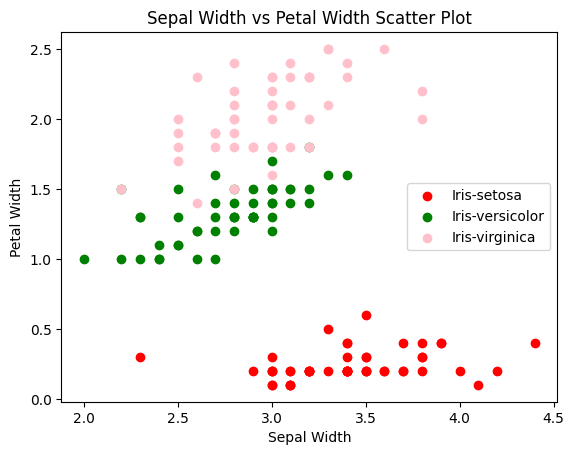

In [17]:
species = df['species'].unique()  # Extract unique species
colors = ['red', 'green', 'pink']  # Define colors for each species

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()
plt.title('Sepal Width vs Petal Width Scatter Plot')
plt.show()

# Coorelation Matrix 
A coorelation matrix is a table showing coorelation betweens variables . Each cell in th labels shows correlation of those two . 

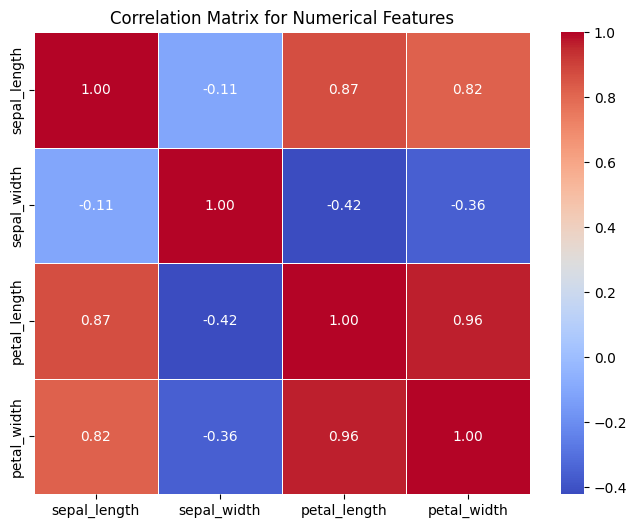

In [18]:
corr_matrix = df.drop(columns=['species']).corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

# Label Encoder 
LabelEncoder is a method from sklearn.preprocessing used to convert categorical data into numerical values. It assigns each unique category a numeric label.

### Why use Label Encoding?
Machine learning models work with numbers, not text.
Converts categorical values into a format models can process.
Useful for correlation analysis, feature engineering, and classification tasks.


In [19]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [20]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
from sklearn.model_selection import train_test_split
#training and test data 
#train 80 
#test 20 
x = df.drop(columns = 'species')
y = df['species']
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.20, random_state = 42) 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predict on test set
y_pred = rf.predict(x_test)

# Convert numeric predictions back to species names
y_pred_labels = le.inverse_transform(y_pred)


In [24]:
# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print Classification Report
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))


Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [26]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Example new flower (sepal_length, sepal_width, petal_length, petal_width)
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example data

# Predict the species
predicted_species = rf.predict(new_sample)

# Convert to species name
print("Predicted Species:", le.inverse_transform(predicted_species)[0])


Predicted Species: Iris-setosa


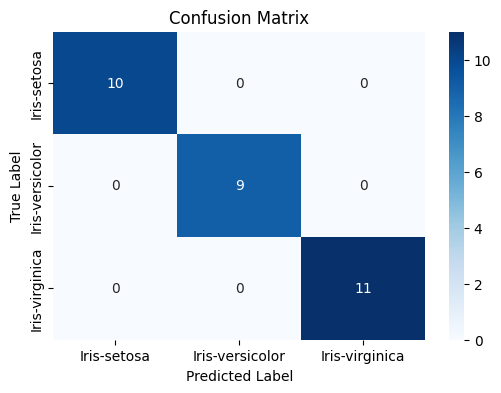

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, rf.predict(x_test))

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
